# 22 K-Means Clustering

K-means clustering is an unsupervised machine learning algorithm that partitions a dataset into `k` clusters by minimizing the variance within each cluster. It iteratively assigns data points to the nearest cluster center and updates the centers based on the mean of the assigned points.

### Why do we need K-means clustering?
- To identify patterns or groupings in unlabeled data.
- To simplify and summarize large datasets.
- To discover hidden structures in data.
- To reduce dimensionality by grouping similar data points.

### Applications of K-means clustering
- Customer segmentation in marketing.
- Image compression and segmentation.
- Anomaly detection in network security.
- Document clustering in natural language processing.
- Pattern recognition in bioinformatics.

Here is some two-dimensional data samples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import time

In [2]:
data = np.array([[8,7],[7,6.6],[9.2,8.3],[6.8,9.2], [1.2,3.2],[4.8,2.3],[3.4,3.2],[3.2,5.6],[1,4],[2,2.2]])

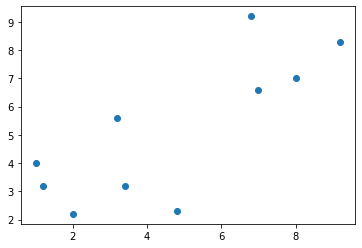

In [3]:
plt.scatter(data[:, 0], data[:, 1]);

First, let's try to find two clusters, so $k=2$.  We must initialize the two means of the two clusters.  Let's just pick two samples at random.

In [4]:
centersIndex = np.random.choice(range(data.shape[0]),2 , replace=False) # data.shape[0] is number of rows, or samples
centersIndex

array([7, 6])

In [5]:
centers = data[centersIndex, :]
centers

array([[3.2, 5.6],
       [3.4, 3.2]])

Now we must find all samples that are closest to the first center, and those that are closest to the second sample.

Before moving on, let's check how numpy handle the subtraction between different shapes of arrays. This is just simple subtraction.

In [6]:
a = np.array([1, 2, 3])
b = np.array([10, 20, 30])
a, b

(array([1, 2, 3]), array([10, 20, 30]))

In [7]:
a - b

array([ -9, -18, -27])

But what if we want to subtract every element of a with every element of b?

In [8]:
np.resize(a, (3, 3))

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [9]:
np.resize(b, (3, 3))

array([[10, 20, 30],
       [10, 20, 30],
       [10, 20, 30]])

In [10]:
np.resize(a,(3, 3)).T

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [12]:
np.resize(a, (3, 3)).T - np.resize(b, (3, 3))

array([[ -9, -19, -29],
       [ -8, -18, -28],
       [ -7, -17, -27]])

However, we can ask numpy to do this duplication for us if we reshape a to be a column vector and leave b as a row vector.

$$ \begin{pmatrix}
1\\
2\\
3
\end{pmatrix}
-
\begin{pmatrix}
10 & 20 & 30
\end{pmatrix}
\;\; = \;\;
\begin{pmatrix}
1 & 1 & 1\\
2 & 2 & 2\\
3 & 3 & 3
\end{pmatrix}
-
\begin{pmatrix}
10 & 20 & 30\\
10 & 20 & 30\\
10 & 20 & 30
\end{pmatrix}
$$

In [13]:
a = a.reshape((-1, 1))
a

array([[1],
       [2],
       [3]])

In [14]:
a - b

array([[ -9, -19, -29],
       [ -8, -18, -28],
       [ -7, -17, -27]])

In [15]:
a = np.array([1, 2, 3])
b = np.array([[10, 20, 30], [40, 50, 60]])
print(a)
print(b)

[1 2 3]
[[10 20 30]
 [40 50 60]]


In [16]:
b - a

array([[ 9, 18, 27],
       [39, 48, 57]])

The single row vector `a` is duplicated for as many rows as there are in `b`!

Given a set of $d$-dimensional observations, k-means clustering aims to partition the sample in to $k$ sets $S$ by minimizing the *within-cluster sum of squares*.

This is equivalent to the variance, so the objective is to find:

$$\text{argmin}_S \sum_{i=1}^k|S_i|\text{Var }S_i = \text{argmin}_S \sum_{i=1}^k\sum_{x \in S_i}\Vert x-\mu_i \Vert^2$$

We can use numpy broadcasting to calculate the squared distance between a center and every sample, given by

    np.sum((centers[0, :] - data) ** 2, axis=1)

In [17]:
centers[0, :]  # zero-th row of centers

array([3.2, 5.6])

In [18]:
np.sum((centers[0, :] - data) ** 2, axis=1)

array([25.  , 15.44, 43.29, 25.92,  9.76, 13.45,  5.8 ,  0.  ,  7.4 ,
       13.  ])

Now we can test, for each sample, if the sample is closest to the first center.

In [19]:
np.sum((centers[1, :] - data) ** 2, axis=1) > np.sum((centers[0, :] - data) ** 2, axis=1)

array([ True,  True,  True,  True, False, False, False,  True, False,
       False])

In [20]:
centers

array([[3.2, 5.6],
       [3.4, 3.2]])

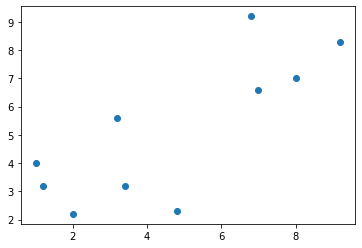

In [21]:
plt.scatter(data[:, 0], data[:, 1])

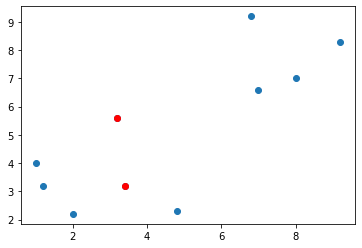

In [22]:
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(centers[:, 0], centers[:, 1], color="r")

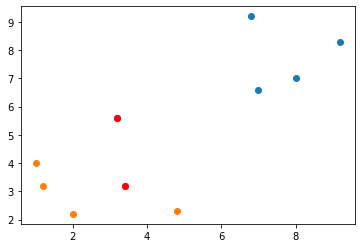

In [23]:
plt.scatter(data[np.sum((centers[1, :] - data) ** 2, axis=1) > np.sum((centers[0, :] - data) ** 2, axis=1)][:,0],
            data[np.sum((centers[1, :] - data) ** 2, axis=1) > np.sum((centers[0, :] - data) ** 2, axis=1)][:, 1])
plt.scatter(centers[0, 0], centers[0, 1], color="r")
plt.scatter(data[np.sum((centers[1, :] - data) ** 2, axis=1) < np.sum((centers[0, :] - data) ** 2, axis=1)][:,0],
            data[np.sum((centers[1, :] - data) ** 2, axis=1) < np.sum((centers[0, :] - data) ** 2, axis=1)][:, 1])
plt.scatter(centers[1, 0], centers[1, 1], color="r")

Sure enough, all the blue points are closer to one center than the other (and same for the orange).

However, we want something a little more general, so it works for as many centers as we have rows in `centers`.

In [24]:
centers[:, np.newaxis, :].shape, data.shape

((2, 1, 2), (10, 2))

In [25]:
(centers[:, np.newaxis, :] - data).shape

(2, 10, 2)

In [27]:
(centers[:, np.newaxis, :] - data) # distance from every data point to each center

array([[[-4.8, -1.4],
        [-3.8, -1. ],
        [-6. , -2.7],
        [-3.6, -3.6],
        [ 2. ,  2.4],
        [-1.6,  3.3],
        [-0.2,  2.4],
        [ 0. ,  0. ],
        [ 2.2,  1.6],
        [ 1.2,  3.4]],

       [[-4.6, -3.8],
        [-3.6, -3.4],
        [-5.8, -5.1],
        [-3.4, -6. ],
        [ 2.2,  0. ],
        [-1.4,  0.9],
        [ 0. ,  0. ],
        [ 0.2, -2.4],
        [ 2.4, -0.8],
        [ 1.4,  1. ]]])

In [28]:
np.sum((centers[:, np.newaxis, :] - data) ** 2, axis=2).shape

(2, 10)

In [29]:
np.sum((centers[:, np.newaxis, :] - data) ** 2, axis=2) # sum of squares for each point

array([[25.  , 15.44, 43.29, 25.92,  9.76, 13.45,  5.8 ,  0.  ,  7.4 ,
        13.  ],
       [35.6 , 24.52, 59.65, 47.56,  4.84,  2.77,  0.  ,  5.8 ,  6.4 ,
         2.96]])

In [30]:
np.argmin(np.sum((centers[:, np.newaxis, :] - data) ** 2, axis=2), axis=0) # argmin gives closest center

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1])

So we can now assign to each sample which center it is closest to.  All samples closest to a particular center forms a cluster.

In [31]:
cluster = np.argmin(np.sum((centers[:,np.newaxis,:] - data)**2, axis=2), axis=0)
cluster

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1])

Once we have collected all of the samples in one cluster, we can calculate a new center for that cluster as the mean of all of the samples in that cluster.

In [32]:
data[cluster == 0, :].mean(axis=0)

array([6.84, 7.34])

In [33]:
data[cluster == 1, :].mean(axis=0)

array([2.48, 2.98])

In [34]:
k = 2
for i in range(k):
    centers[i, :] = data[cluster == i, :].mean(axis=0)

In [35]:
centers

array([[6.84, 7.34],
       [2.48, 2.98]])

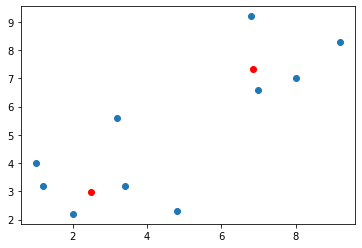

In [36]:
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(centers[:, 0], centers[:, 1], color="r")

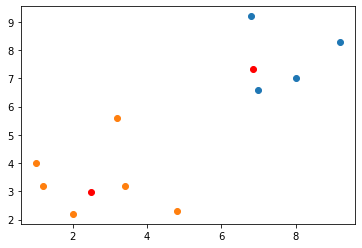

In [37]:
plt.scatter(data[np.sum((centers[1, :] - data) ** 2, axis=1) > np.sum((centers[0, :] - data) ** 2, axis=1)][:,0],
            data[np.sum((centers[1, :] - data) ** 2, axis=1) > np.sum((centers[0, :] - data) ** 2, axis=1)][:, 1])
plt.scatter(centers[0, 0], centers[0, 1], color="r")
plt.scatter(data[np.sum((centers[1, :] - data) ** 2, axis=1) < np.sum((centers[0, :] - data) ** 2, axis=1)][:,0],
            data[np.sum((centers[1, :] - data) ** 2, axis=1) < np.sum((centers[0, :] - data) ** 2, axis=1)][:, 1])
plt.scatter(centers[1, 0], centers[1, 1], color="r")

In [39]:
def kmeans(data, k = 2, n_iterations = 5):
    
    # Initial centers
    centers = data[np.random.choice(range(data.shape[0]), k, replace=False), :]
    
    # Repeat n times
    for iteration in range(n_iterations):
        
        # Which center is each sample closest to?
        closest = np.argmin(np.sum((centers[:, np.newaxis, :] - data) ** 2, axis=2), axis=0)
        
        # Update cluster centers
        for i in range(k):
            centers[i, :] = data[closest == i, :].mean(axis=0)
            
    return centers, closest

In [40]:
kmeans(data, k=2, n_iterations=5)

(array([[2.6       , 3.41666667],
        [7.75      , 7.775     ]]),
 array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0]))

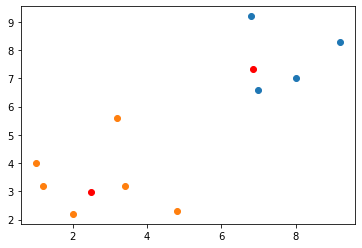

In [41]:
plt.scatter(data[np.sum((centers[1, :] - data) ** 2, axis=1) > np.sum((centers[0, :] - data) ** 2, axis=1)][:,0],
            data[np.sum((centers[1, :] - data) ** 2, axis=1) > np.sum((centers[0, :] - data) ** 2, axis=1)][:, 1])
plt.scatter(centers[0, 0], centers[0, 1], color="r")
plt.scatter(data[np.sum((centers[1, :] - data) ** 2, axis=1) < np.sum((centers[0, :] - data) ** 2, axis=1)][:,0],
            data[np.sum((centers[1, :] - data) ** 2, axis=1) < np.sum((centers[0, :] - data) ** 2, axis=1)][:, 1])
plt.scatter(centers[1, 0], centers[1, 1], color="r")

In [42]:
kmeans(data, k=2, n_iterations=5)

(array([[7.75      , 7.775     ],
        [2.6       , 3.41666667]]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]))

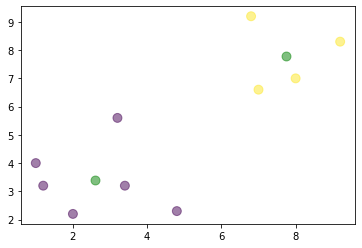

In [43]:
centers, closest = kmeans(data, k=2, n_iterations=2)
plt.scatter(data[:, 0], data[:, 1], s=80, c=closest, alpha=0.5);
plt.scatter(centers[:, 0], centers[:, 1], s=80, c='green', alpha=0.5); 

Why does the second time we call `kmeans` produce a different answer?

Let's define $J$ as the performance measure being minimized by *k-means*.
$$
J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} ||\mathbf{x}_n - \mathbf{\mu}_k||^2
$$
where $N$ is the number of samples, $K$ is the number of cluster centers, $\mathbf{x}_n$ is the $n^{th}$ sample and $\mathbf{\mu}_k$ is the $k^{th}$ center, each being an element of $\mathbf{R}^p$ where $p$ is the dimensionality of the data, and $r_{nk}$ is 1 if cluster $k$ is closest to sample $n$, 0 otherwise.

The sums can be computed using python *for* loops, but *for* loops are much slower than matrix operations in python, as the following cells show.

In [56]:
a = np.linspace(0, 10, 10000).reshape(1000, 10)
a

array([[0.00000000e+00, 1.00010001e-03, 2.00020002e-03, ...,
        7.00070007e-03, 8.00080008e-03, 9.00090009e-03],
       [1.00010001e-02, 1.10011001e-02, 1.20012001e-02, ...,
        1.70017002e-02, 1.80018002e-02, 1.90019002e-02],
       [2.00020002e-02, 2.10021002e-02, 2.20022002e-02, ...,
        2.70027003e-02, 2.80028003e-02, 2.90029003e-02],
       ...,
       [9.97099710e+00, 9.97199720e+00, 9.97299730e+00, ...,
        9.97799780e+00, 9.97899790e+00, 9.97999800e+00],
       [9.98099810e+00, 9.98199820e+00, 9.98299830e+00, ...,
        9.98799880e+00, 9.98899890e+00, 9.98999900e+00],
       [9.99099910e+00, 9.99199920e+00, 9.99299930e+00, ...,
        9.99799980e+00, 9.99899990e+00, 1.00000000e+01]])

In [57]:
b = np.arange(10000).reshape(1000, 10)
b

array([[   0,    1,    2, ...,    7,    8,    9],
       [  10,   11,   12, ...,   17,   18,   19],
       [  20,   21,   22, ...,   27,   28,   29],
       ...,
       [9970, 9971, 9972, ..., 9977, 9978, 9979],
       [9980, 9981, 9982, ..., 9987, 9988, 9989],
       [9990, 9991, 9992, ..., 9997, 9998, 9999]])

In [58]:
result = np.zeros((1000, 10))
start_time = time.time()
for i in range(1000):
    for j in range(10):
        result[i, j] = a[i, j] + b[i, j]
print(f"Took {time.time()-start_time} seconds")
result

Took 0.018728971481323242 seconds


array([[0.00000000e+00, 1.00100010e+00, 2.00200020e+00, ...,
        7.00700070e+00, 8.00800080e+00, 9.00900090e+00],
       [1.00100010e+01, 1.10110011e+01, 1.20120012e+01, ...,
        1.70170017e+01, 1.80180018e+01, 1.90190019e+01],
       [2.00200020e+01, 2.10210021e+01, 2.20220022e+01, ...,
        2.70270027e+01, 2.80280028e+01, 2.90290029e+01],
       ...,
       [9.97997100e+03, 9.98097200e+03, 9.98197300e+03, ...,
        9.98697800e+03, 9.98797900e+03, 9.98898000e+03],
       [9.98998100e+03, 9.99098200e+03, 9.99198300e+03, ...,
        9.99698800e+03, 9.99798900e+03, 9.99899000e+03],
       [9.99999100e+03, 1.00009920e+04, 1.00019930e+04, ...,
        1.00069980e+04, 1.00079990e+04, 1.00090000e+04]])

In [59]:
start_time = time.time()
result = a+b
print(f"Took {time.time()-start_time} seconds")
result

Took 0.0006771087646484375 seconds


array([[0.00000000e+00, 1.00100010e+00, 2.00200020e+00, ...,
        7.00700070e+00, 8.00800080e+00, 9.00900090e+00],
       [1.00100010e+01, 1.10110011e+01, 1.20120012e+01, ...,
        1.70170017e+01, 1.80180018e+01, 1.90190019e+01],
       [2.00200020e+01, 2.10210021e+01, 2.20220022e+01, ...,
        2.70270027e+01, 2.80280028e+01, 2.90290029e+01],
       ...,
       [9.97997100e+03, 9.98097200e+03, 9.98197300e+03, ...,
        9.98697800e+03, 9.98797900e+03, 9.98898000e+03],
       [9.98998100e+03, 9.99098200e+03, 9.99198300e+03, ...,
        9.99698800e+03, 9.99798900e+03, 9.99899000e+03],
       [9.99999100e+03, 1.00009920e+04, 1.00019930e+04, ...,
        1.00069980e+04, 1.00079990e+04, 1.00090000e+04]])

In [60]:
a.shape, a[:, np.newaxis].shape

((1000, 10), (1000, 1, 10))


Now, back to our problem.  How can we use matrix operations to calculate the squared distance between two centers and, say, five data samples?  Let's say both are two-dimensional.

In [61]:
centers = np.array([[1, 2], [5, 4]])
centers

array([[1, 2],
       [5, 4]])

In [62]:
data = np.array([[3, 2], [4, 6], [7, 3], [4, 6], [1, 8]])
data

array([[3, 2],
       [4, 6],
       [7, 3],
       [4, 6],
       [1, 8]])

This will be a little weird, and hard to understand, but by adding an empty dimension to the `centers` array, numpy broadcasting does all the work for us. 

In [63]:
centers[:, np.newaxis, :]

array([[[1, 2]],

       [[5, 4]]])

In [64]:
centers[:, np.newaxis, :].shape

(2, 1, 2)

In [65]:
data.shape

(5, 2)

In [66]:
diffsq = (centers[:, np.newaxis, :] - data) ** 2
diffsq

array([[[ 4,  0],
        [ 9, 16],
        [36,  1],
        [ 9, 16],
        [ 0, 36]],

       [[ 4,  4],
        [ 1,  4],
        [ 4,  1],
        [ 1,  4],
        [16, 16]]])

In [67]:
diffsq.shape

(2, 5, 2)

In [68]:
np.sum(diffsq, axis=2)

array([[ 4, 25, 37, 25, 36],
       [ 8,  5,  5,  5, 32]])

Now we have a 2 x 5 array with the first row containing the squared distance from the first center to each of the five data samples, and the second row containing the squared distances from the second center to each of the five data samples.

Now we just have to find the smallest distance in each column and sum them up.

In [69]:
np.min(np.sum(diffsq, axis=2), axis=0)

array([ 4,  5,  5,  5, 32])

In [70]:
np.sum(np.min(np.sum(diffsq, axis=2), axis=0))

51

Let's define a function named *calcJ* to do this calculation.

In [71]:
def calcJ(data, centers, not_empty=None):
    
    if  not_empty is None:
        not_empty = [True] * centers.shape[0]
    diffsq = (centers[np.array(not_empty), np.newaxis, :] - data) ** 2
    return np.sum(np.min(np.sum(diffsq, axis=2), axis=0))

In [72]:
calcJ(data, centers)

51

In [73]:
def kmeans(data, k = 2, n_iterations = 5):
    
    # Initialize centers and list J to track performance metric
    centers = data[np.random.choice(range(data.shape[0]), k, replace=False), :]
    J = []
    # Calculate J and append to list J
    J = [calcJ(data, centers, not_empty=None)]
     
    # Repeat n times
    for iteration in range(n_iterations):
        
        # Which center is each sample closest to?
        sqdistances = np.sum((centers[:, np.newaxis, :] - data) ** 2, axis=2)
        closest = np.argmin(sqdistances, axis=0)
        if iteration == 0:
            last_closest = closest.copy()
        else:
            if np.all(closest == last_closest):
                break
        
        # Update cluster centers
        not_empty = [True] * k
        for i in range(k):
            if np.sum(closest == i) == 0:
                not_empty[i] = False
            else:
                centers[i, :] = data[closest==i, :].mean(axis=0)
            
        # Calculate J one final time and return results
        J.append(calcJ(data, centers, not_empty))
    
    return centers, J, closest, not_empty

In [74]:
centers, J, closest, not_empty = kmeans(data, k=2, n_iterations=5)

In [75]:
not_empty

[True, True]

In [76]:
J

[43, 19]

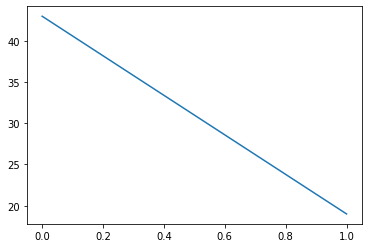

In [77]:
plt.plot(J)

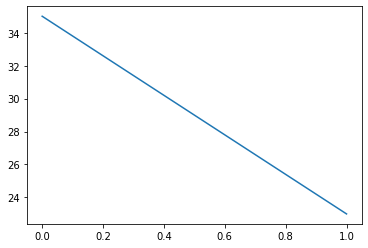

In [78]:
centers, J, closest, not_empty = kmeans(data, k=2, n_iterations=10)
plt.plot(J)

In [79]:
data.shape

(5, 2)

[True, True, True, True, False]

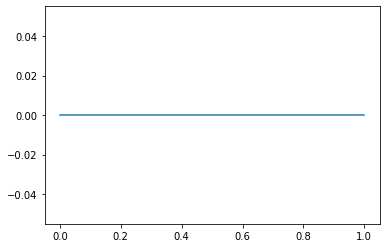

In [81]:
centers, J, closest, not_empty = kmeans(data, k=5, n_iterations=10)
plt.plot(J)
not_empty

Here, since there are only five samples, $J$ is 0 for all centers (since each sample is a center, and therefore the minimum distance from a sample to a center is 0).

In [82]:
# multivariate normal function from Lecture 20
def mv_normal(n, mean, sigma):                                                 
    mean = np.array(mean) # to allow entry of values as simple lists                                                       
    sigma = np.array(sigma)                                                     
    X = np.random.normal(0, 1, n * len(mean)).reshape((n, len(mean)))                
    return np.dot(X, np.linalg.cholesky(sigma)) + mean        

In [83]:
N = 200
data = mv_normal(N, [0, 4], [[0.9, 0.8], [0.8, 0.9]])

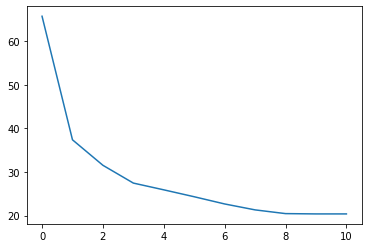

In [84]:
centers, J, closest, not_empty = kmeans(data, k=10, n_iterations=10)
plt.plot(J)

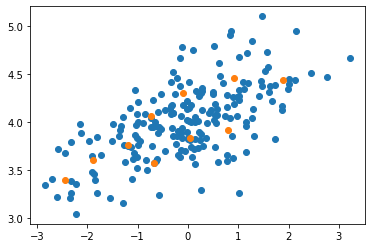

In [87]:
plt.scatter(data[:,0],data[:,1])
plt.scatter(centers[:,0],centers[:,1])

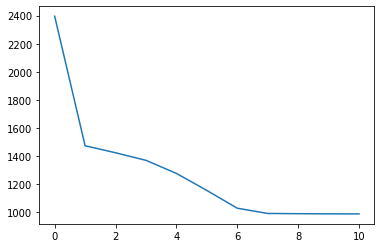

In [95]:
N = 200
data1 = mv_normal(N, [0, 4], [[0.9 ,0.8], [0.8, 0.9]])
data2 = mv_normal(N, [-5, 3], [[0.9, -0.8], [-0.8, 0.9]])
data3 = mv_normal(N, [-2, 6], [[0.9 ,0.1], [0.8, 0.8]])
data = np.vstack((data1, data2, data3))

centers, J, closest, not_empty = kmeans(data, k=3, n_iterations=10)
plt.plot(J)

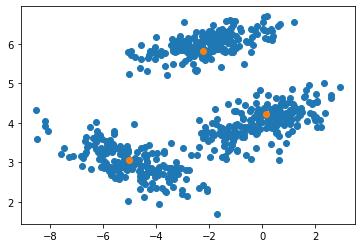

In [96]:
plt.scatter(data[:,0],data[:,1])
plt.scatter(centers[:,0],centers[:,1])

## Old Faithful Data

Let's represent clusters as a list of sample matrices, each matrix containing samples from one cluster.  Initially, all samples are in their own clusters.  Let's use the Old Faithful data to develop our implementation. Download it from [here](https://www.cs.colostate.edu/~cs445/notebooks/oldfaithful.csv).

In [97]:
!head oldfaithful.csv

"","eruptions","waiting"
"1",3.6,79
"2",1.8,54
"3",3.333,74
"4",2.283,62
"5",4.533,85
"6",2.883,55
"7",4.7,88
"8",3.6,85
"9",1.95,51


In [98]:
data = pandas.read_csv('oldfaithful.csv')
data = data.iloc[:,1:]

In [99]:
data

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [100]:
data.shape

(272, 2)

In [101]:
data = data.to_numpy()

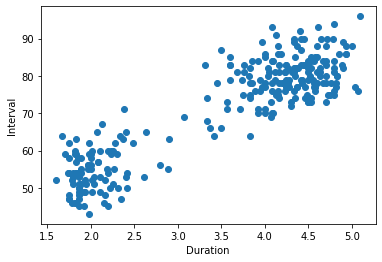

In [102]:
plt.scatter(data[:,0],data[:,1]);
plt.xlabel('Duration')
plt.ylabel('Interval');

k=10 n_not_empty=10


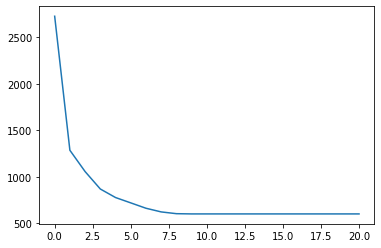

In [105]:
k = 10
centers, J, closest, not_empty = kmeans(data, k=k, n_iterations=20)

print(f'k={k} n_not_empty={sum(not_empty)}')
plt.plot(J);

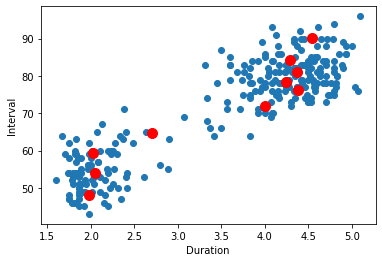

In [106]:
plt.scatter(data[:,0],data[:,1]);
plt.xlabel('Duration')
plt.ylabel('Interval')

plt.plot(centers[:, 0], centers[:, 1], 'ro', ms=10)

k=3 n_not_empty=3


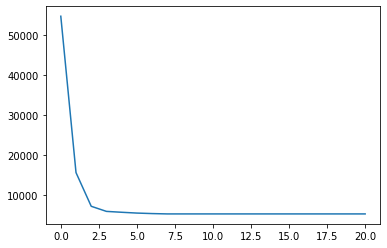

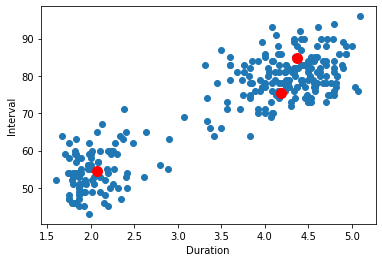

In [107]:
k = 3
centers, J, closest, not_empty = kmeans(data, k=k, n_iterations=20)

print(f'k={k} n_not_empty={sum(not_empty)}')
plt.plot(J);

plt.figure()

plt.scatter(data[:,0],data[:,1]);
plt.xlabel('Duration')
plt.ylabel('Interval')

plt.plot(centers[:, 0], centers[:, 1], 'ro', ms=10);

k=2 n_not_empty=2


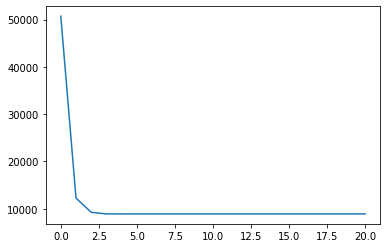

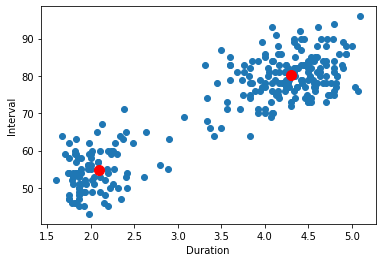

In [108]:
k = 2
centers, J, closest, not_empty = kmeans(data, k=k, n_iterations=20)

print(f'k={k} n_not_empty={sum(not_empty)}')
plt.plot(J);

plt.figure()

plt.scatter(data[:,0],data[:,1]);
plt.xlabel('Duration')
plt.ylabel('Interval')

plt.plot(centers[:, 0], centers[:, 1], 'ro', ms=10);

## MNIST Data

In [109]:
import gzip
import pickle

with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

X = train_set[0]
T = train_set[1].reshape((-1,1))

Xtest = test_set[0]
Ttest = test_set[1].reshape((-1,1))

X.shape, T.shape, Xtest.shape, Ttest.shape

((50000, 784), (50000, 1), (10000, 784), (10000, 1))

In [110]:
k = 10
centers, J, closest, not_empty = kmeans(X, k=k, n_iterations=20)
print(f'k={k} n_not_empty={sum(not_empty)}')

k=10 n_not_empty=10


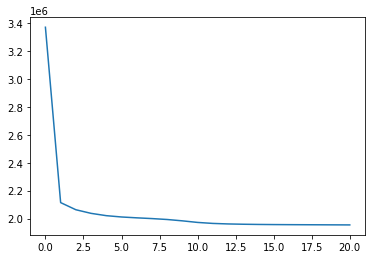

In [111]:
plt.plot(J);

In [112]:
centers.shape

(10, 784)

In [113]:
centers[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.43496756e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.41761750e-04,
       1.93138490e-03, 2.84533622e-03, 2.68098153e-03, 3.28100659e-03,
       4.14104247e-03, 4.18626191e-03, 3.19752470e-03, 2.74272310e-03,
       2.10617483e-03, 5.67849784e-04, 2.83490081e-04, 1.30440230e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [115]:
np.round(centers[0].reshape(28,28),2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.01, 0.02, 0.05, 0.07, 0.1 , 0.12, 0.12, 0.11, 0.08, 0.05, 0.03,
        0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01,
        0.03, 0.06, 0.12, 0.2 , 0.27, 0.31, 0.31, 0.27, 0.2 , 0.12, 0.06,
        0.03, 0.01, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.02,
        0.05, 0.12, 0.22, 0.34, 0.44, 0.48, 0.44, 0.36, 0.24, 0.14, 0.07,
        0.03, 0.02, 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0. 

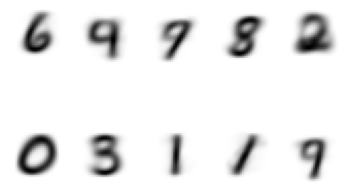

In [116]:
for i in range(10):
    plt.subplot(2, 5 ,i + 1)
    plt.imshow(-centers[i, :].reshape((28, 28)), cmap='gray')
    plt.axis('off')

k=10 n_not_empty=10


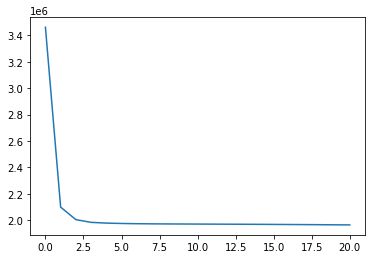

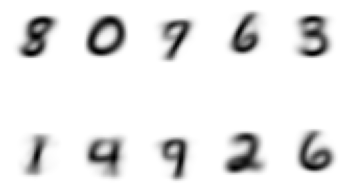

In [117]:
k = 10
centers, J, closest, not_empty = kmeans(X, k=k, n_iterations=20)
print(f'k={k} n_not_empty={sum(not_empty)}')
plt.plot(J)
plt.figure()
for i in range(k):
    plt.subplot(2, 5, i + 1)
    plt.imshow(-centers[i, :].reshape((28, 28)), cmap='gray')
    plt.axis('off')

k=20 n_not_empty=20


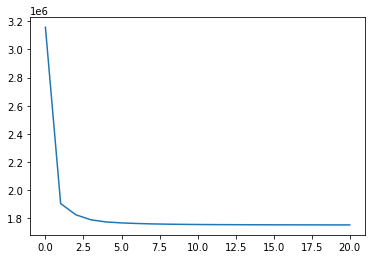

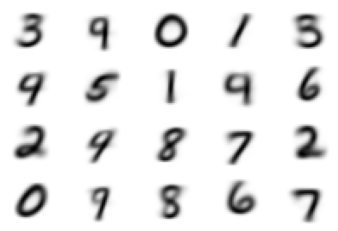

In [368]:
k = 20
centers, J, closest, not_empty = kmeans(X, k=k, n_iterations=20)
print(f'k={k} n_not_empty={sum(not_empty)}')
plt.plot(J)
plt.figure()
for i in range(k):
    plt.subplot(4, 5, i + 1)
    plt.imshow(-centers[i, :].reshape((28, 28)), cmap='gray')
    plt.axis('off')

In [370]:
centers.shape

(20, 784)

In [369]:
k = centers.shape[0]
df = pandas.DataFrame({'0': np.zeros(k),
                      '1': np.zeros(k),
                      '2': np.zeros(k),
                      '3': np.zeros(k),
                      '4': np.zeros(k),
                      '5': np.zeros(k),
                      '6': np.zeros(k),
                      '7': np.zeros(k),
                      '8': np.zeros(k),
                      '9': np.zeros(k)})

for center_i, center in enumerate(centers):
    df.iloc[0, 0] = center_i
    uniques, counts = np.unique(T[closest == center_i], return_counts=True)
    df.iloc[center_i, uniques] = 100 * counts / sum(counts)
    
df

,0,1,2,3,4,5,6,7,8,9
0,19.000000,0.129997,2.664933,69.808255,0.000000,20.311992,0.162496,0.032499,4.029899,0.714982
1,0.198939,0.397878,3.017241,3.415119,36.836870,3.216180,0.298408,8.355438,1.624668,42.639257
2,95.337257,0.000000,0.407424,0.452694,0.045269,0.905387,1.267542,0.271616,0.769579,0.543232
3,0.033761,83.693450,3.983795,0.945307,1.688049,0.708980,1.147873,4.118839,2.835922,0.844024
4,2.538741,0.000000,1.153973,48.071217,0.065941,31.025387,0.659413,0.131883,15.265414,1.088032
5,0.141844,0.000000,0.094563,0.283688,49.078014,1.843972,0.000000,3.924350,2.553191,42.080378
6,10.175597,0.675371,4.457452,4.457452,1.305718,63.079694,6.078343,1.395768,7.879334,0.495272
7,0.000000,83.087644,3.430716,3.832753,0.804074,1.259716,1.554543,1.956580,3.403913,0.670062
8,0.799645,0.000000,2.709907,0.666371,47.934251,3.065304,1.999112,7.463350,1.599289,33.762772
9,5.819925,0.171174,2.567614,0.650462,2.362205,2.499144,85.039370,0.000000,0.821636,0.068470
